In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
dataset= pd.read_csv("Advertising.csv")
dataset.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [3]:
dataset.shape

(200, 5)

In [4]:
dataset.isna().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [5]:
dataset.duplicated().any()

False

C:\Users\SAHYADRI\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\SAHYADRI\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\SAHYADRI\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\SAHYADRI\anac

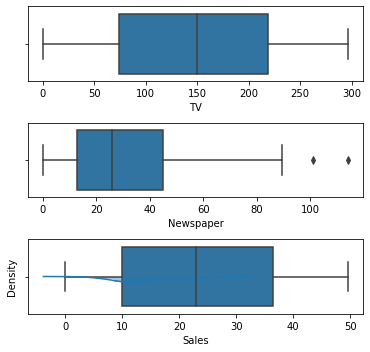

In [6]:
fig,axs=plt.subplots(3,figsize=(5,5))
plt1=sns.boxplot(dataset['TV'],ax=axs[0])
plt2=sns.boxplot(dataset['Newspaper'],ax=axs[1])
plt3=sns.boxplot(dataset['Radio'],ax=axs[2])
plt.tight_layout()


sns.distplot(dataset['Sales']);

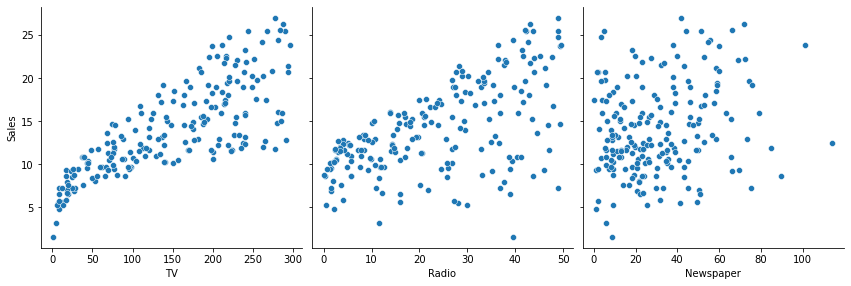

In [7]:
sns.pairplot(dataset,x_vars=['TV','Radio','Newspaper'],y_vars='Sales',height=4,aspect=1,kind='scatter')
plt.show()


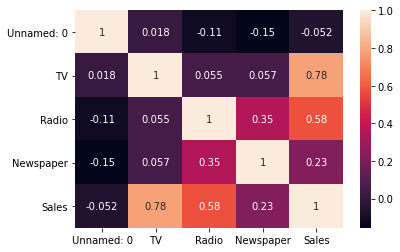

In [8]:
sns.heatmap(dataset.corr(),annot=True)
plt.show()

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics


In [10]:
x=dataset[['TV']]
y=dataset['Sales']


x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=100)

In [11]:
slr=LinearRegression()
slr.fit(x_train,y_train)

LinearRegression()

In [12]:
print('Intercept:',slr.intercept_)
print('Coefficient:',slr.coef_)

print('Regression Equation: Sales= 6.989+0.046*TV')

Intercept: 6.989665857411679
Coefficient: [0.04649736]
Regression Equation: Sales= 6.989+0.046*TV


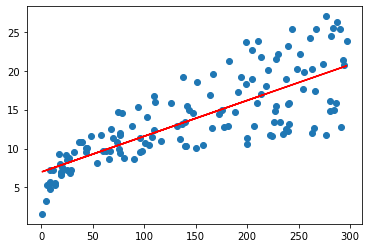

In [13]:
plt.scatter(x_train,y_train)
plt.plot(x_train,6.989+0.046*x_train,'r')
plt.show()

In [14]:
y_pred_slr=slr.predict(x_test)
x_pred_slr=slr.predict(x_train)
print("Prediction for test set: {}".format(y_pred_slr))

Prediction for test set: [ 7.35234526 18.06533671 13.27610876 17.11214086 18.22807747 16.60531965
 13.4620982  16.17754395 17.05169429 17.07029323 12.4391563  17.66080969
  9.60281742 15.72186983 11.04423554 11.36971705 13.95032046 14.90351632
 14.59198401 12.23921766 16.97264878 13.00642408 16.07524976 15.21969836
 15.58702749 17.23303399 17.20978531 10.49091697 15.58702749 12.71349072
 10.1700852  10.19798361 12.61584627 15.74976825  9.31453379 12.59259759
 11.50920913 14.81982107 17.33067844 15.97295557 17.00519693 15.15925179
 14.63848137 17.14933874 12.57864838 11.16047894  7.77547122 18.55820871
 10.27237939  8.76586496 16.405381   14.95466341 10.4816175  13.08546959
 16.78665935  9.05879832  7.78942043  8.17999824 16.17754395 10.9744895 ]


In [15]:
slr_diff=pd.DataFrame({'Actual Value':y_test,'Predicted Value': y_pred_slr})
slr_diff

,Actual Value,Predicted Value
126,6.6,7.352345
104,20.7,18.065337
99,17.2,13.276109
92,19.4,17.112141
111,21.8,18.228077
167,12.2,16.605320
116,12.2,13.462098
96,11.7,16.177544
52,22.6,17.051694
69,22.3,17.070293


In [16]:
slr.predict([[56]])

array([9.59351795])

In [17]:
from sklearn.metrics import accuracy_score
print('R sqaured value of the model: {:.2f}'.format(slr.score(x,y)*100))

R sqaured value of the model: 61.02
